In [63]:
import os
from dotenv import load_dotenv
from huggingface_hub import login

load_dotenv()

HF_TOKEN = os.getenv('secret_token_hugface')
if HF_TOKEN:
    login(HF_TOKEN)
    print("Successfully logged in to Hugging Face!")
else:
    print("Token is not set. Please add it to Secrets.")

Successfully logged in to Hugging Face!


In [64]:
import pandas as pd

splits = {'train': 'train_df.csv', 'validation': 'val_df.csv', 'test': 'test_df.csv'}
df = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["train"])

In [65]:
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


In [66]:
df.head(n=5)

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [67]:
df.tail(n=3)

,id,text,label,sentiment
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral
31231,15795,Missed the play,0,negative


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [69]:
df.describe()

,id,label
count,31232.000000,31232.000000
mean,10576.775359,1.043961
std,8010.753795,0.790636
min,0.000000,0.000000
25%,3476.000000,0.000000
50%,8662.000000,1.000000
75%,17071.500000,2.000000
max,27480.000000,2.000000


In [70]:
#remove the null and suplicates in the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [72]:
#remove the colum id as its not relevant
df.drop(columns=['id'], inplace=True)

In [73]:
#labels can be taken as columns to improve features  by encoding
df['label'].value_counts()


label
1    11649
2    10478
0     9105
Name: count, dtype: int64

In [74]:
#one hot encoding should be done to improve features
df = pd.get_dummies(df, columns=['label'],prefix='label')
df


,text,sentiment,label_0,label_1,label_2
0,"Cooking microwave pizzas, yummy",positive,False,False,True
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True
3,naw idk what ur talkin about,neutral,False,True,False
4,That sucks to hear. I hate days like that,negative,True,False,False
...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False
31228,4 cases of swine flu!,neutral,False,True,False
31229,excellent,positive,False,False,True
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False


In [75]:
# check text length and add as a column for the data
df['text_length'] = df['text'].apply(len)
df

,text,sentiment,label_0,label_1,label_2,text_length
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128
3,naw idk what ur talkin about,neutral,False,True,False,29
4,That sucks to hear. I hate days like that,negative,True,False,False,42
...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48
31228,4 cases of swine flu!,neutral,False,True,False,21
31229,excellent,positive,False,False,True,9
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95


In [76]:
#check for the word count  for every text and add as a column
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df


,text,sentiment,label_0,label_1,label_2,text_length,word_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22
3,naw idk what ur talkin about,neutral,False,True,False,29,6
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9
...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9
31228,4 cases of swine flu!,neutral,False,True,False,21,5
31229,excellent,positive,False,False,True,9,1
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19


In [77]:
#create a method to check the regex count or use counter library
import re
from collections import Counter

def count_symbols(text):
  pattern = r'[^\w\s]'
  matches = re.findall(pattern, text)  # list of all regex matches
  #counts = Counter(matches)  # count each matched pattern occurrence
  return len(matches) # Return the total count of symbols

In [78]:
df['symbol_count'] = df['text'].apply(count_symbols)

In [79]:
df

,text,sentiment,label_0,label_1,label_2,text_length,word_count,symbol_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4,1
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12,1
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22,9
3,naw idk what ur talkin about,neutral,False,True,False,29,6,0
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9,1
...,...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9,4
31228,4 cases of swine flu!,neutral,False,True,False,21,5,1
31229,excellent,positive,False,False,True,9,1,0
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19,0


In [80]:
#replace column header label_2 as label_positive
df.rename(columns={'label_0': 'label_negative'}, inplace=True)
df.rename(columns={'label_1': 'label_neutral'}, inplace=True)
df.rename(columns={'label_2': 'label_positive'}, inplace=True)
df

,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4,1
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12,1
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22,9
3,naw idk what ur talkin about,neutral,False,True,False,29,6,0
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9,1
...,...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9,4
31228,4 cases of swine flu!,neutral,False,True,False,21,5,1
31229,excellent,positive,False,False,True,9,1,0
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19,0


<module 'matplotlib.pyplot' from 'c:\\Users\\devikrishna.u\\AppData\\Local\\miniconda3\\envs\\sentimentENV\\Lib\\site-packages\\matplotlib\\pyplot.py'>

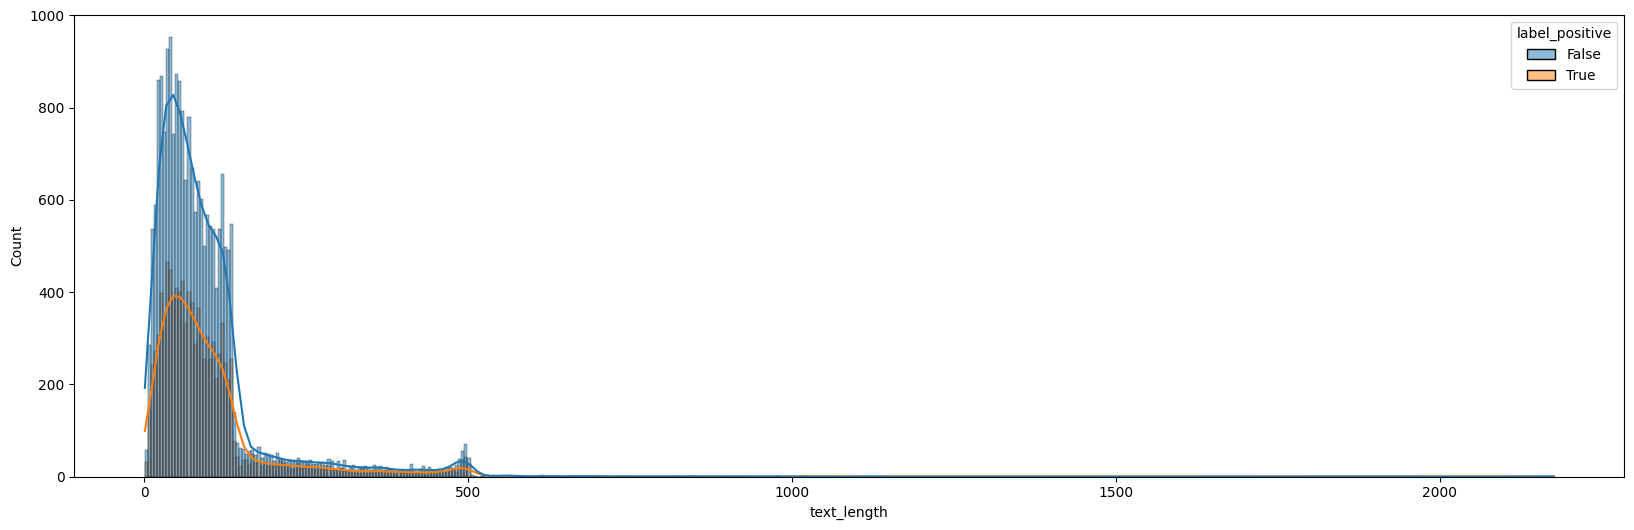

In [81]:
#visual analysis of the dataframe
import matplotlib.pyplot as plt
import seaborn as sns

#plot histograms for text_lengths vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='text_length', hue='label_positive', kde=True)
plt


<module 'matplotlib.pyplot' from 'c:\\Users\\devikrishna.u\\AppData\\Local\\miniconda3\\envs\\sentimentENV\\Lib\\site-packages\\matplotlib\\pyplot.py'>

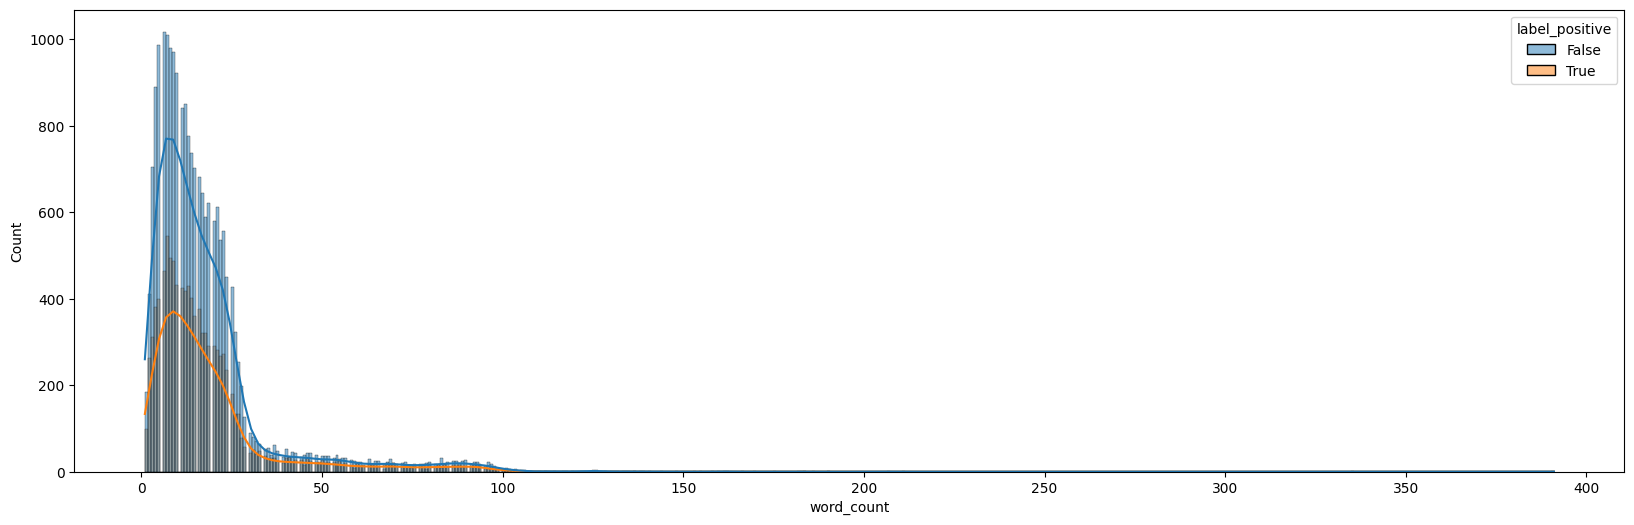

In [82]:
#plot histograms for word_counts vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='word_count', hue='label_positive', kde=True)
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\devikrishna.u\\AppData\\Local\\miniconda3\\envs\\sentimentENV\\Lib\\site-packages\\matplotlib\\pyplot.py'>

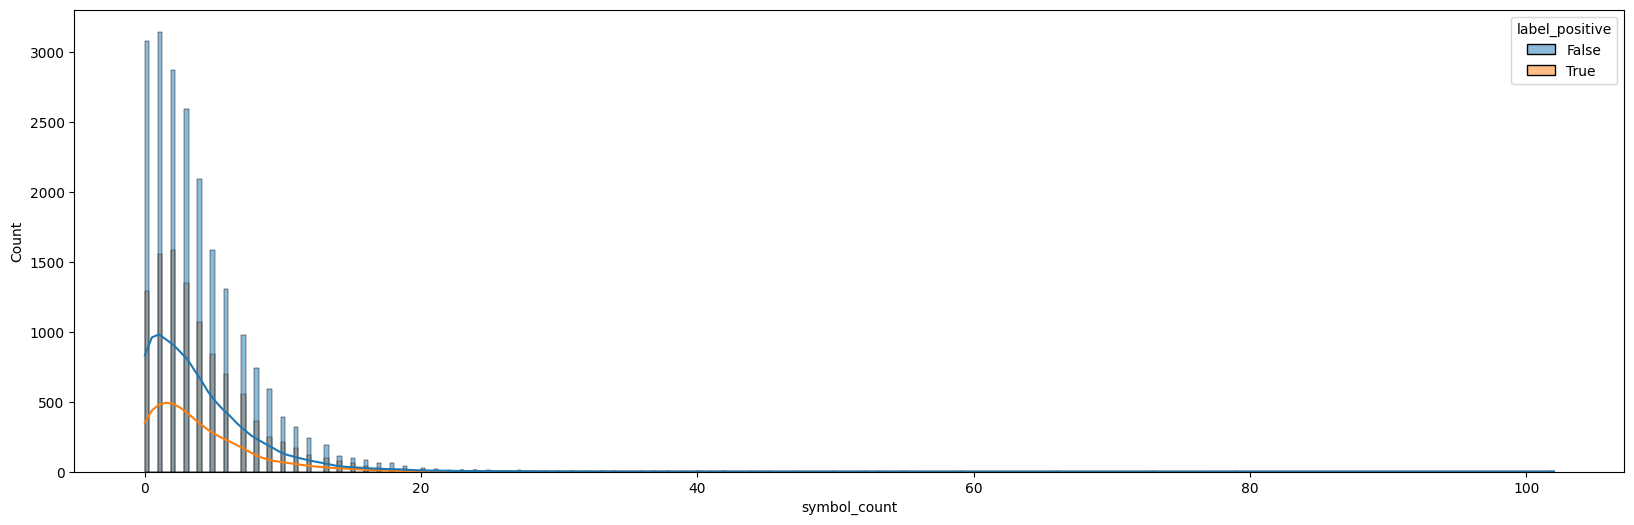

In [83]:

#plot histograms for text_lengths vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='symbol_count', hue='label_positive', kde=True)
plt

In [84]:
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
import nltk

# Download stopwords if not already done
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devikrishna.u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

stop_words = set(stopwords.words('english'))
tokenizer = WordPunctTokenizer()

def remove_stopwords(text):
    # Tokenize sentence into words
    if not isinstance(text, str):
        return ''
    tokens = tokenizer.tokenize(text)

    # Remove stop words and punctuations
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    # Join the filtered tokens back into a string before applying regex
    cleaned_text = ' '.join(filtered_tokens)

    # Apply regex to remove any remaining non-alphanumeric characters (excluding whitespace)
    return re.sub(r'[^\w\s]', '', cleaned_text)

In [86]:
df['text']= df['text'].apply(remove_stopwords)
df

,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,Cooking microwave pizzas yummy,positive,False,False,True,31,4,1
1,plans allowing sub tasks show widget,neutral,False,True,False,57,12,1
2,love humor reworded Like saying group therapy ...,positive,False,False,True,128,22,9
3,naw idk ur talkin,neutral,False,True,False,29,6,0
4,sucks hear hate days like,negative,True,False,False,42,9,1
...,...,...,...,...,...,...,...,...
31227,Grrrr got wrong size coat sheep,negative,True,False,False,48,9,4
31228,4 cases swine flu,neutral,False,True,False,21,5,1
31229,excellent,positive,False,False,True,9,1,0
31230,sitting thru boring bits Titanic waiting good ...,neutral,False,True,False,95,19,0


In [87]:
# Now I have transformed the data of Xtrain

**Transform the test data**

In [88]:
#I have to transform the xtest
df_test = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["test"])

In [89]:
df_test

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive
...,...,...,...,...
5201,10277,Fuck no internet damn time warner!,0,negative
5202,8610,Looking forward to android 1.5 being pushed t...,1,neutral
5203,8114,Not good. Wasted time.,0,negative
5204,3034,"U were great, as always. But, can`t we do an ...",2,positive


In [90]:
df_test = pd.get_dummies(df_test, columns=['label'],prefix='label')
df_test

,id,text,sentiment,label_0,label_1,label_2
0,9235,getting cds ready for tour,neutral,False,True,False
1,16790,"MC, happy mother`s day to your mom ;).. love yah",positive,False,False,True
2,24840,A year from now is graduation....i am pretty s...,negative,True,False,False
3,20744,because you had chips and sale w/o me,neutral,False,True,False
4,6414,Great for organising my work life balance,positive,False,False,True
...,...,...,...,...,...,...
5201,10277,Fuck no internet damn time warner!,negative,True,False,False
5202,8610,Looking forward to android 1.5 being pushed t...,neutral,False,True,False
5203,8114,Not good. Wasted time.,negative,True,False,False
5204,3034,"U were great, as always. But, can`t we do an ...",positive,False,False,True


In [91]:
# Drop the 'id' column
#df_test.drop(columns=['id'], inplace=True)

# drop the rows that are duplicate and null values for texts
df_test.dropna(inplace=True)
df_test.drop_duplicates(inplace=True)

# Calculate text length, word count, and symbol count
df_test['text_length'] = df_test['text'].apply(len)
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))
df_test['symbol_count'] = df_test['text'].apply(count_symbols)

# Rename the label columns to match the training data
df_test.rename(columns={'label_0': 'label_negative', 'label_1': 'label_neutral', 'label_2': 'label_positive'}, inplace=True)

In [92]:
df_test

,id,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,9235,getting cds ready for tour,neutral,False,True,False,26,5,0
1,16790,"MC, happy mother`s day to your mom ;).. love yah",positive,False,False,True,49,10,6
2,24840,A year from now is graduation....i am pretty s...,negative,True,False,False,76,14,11
3,20744,because you had chips and sale w/o me,neutral,False,True,False,38,8,1
4,6414,Great for organising my work life balance,positive,False,False,True,41,7,0
...,...,...,...,...,...,...,...,...,...
5201,10277,Fuck no internet damn time warner!,negative,True,False,False,34,6,1
5202,8610,Looking forward to android 1.5 being pushed t...,neutral,False,True,False,60,11,2
5203,8114,Not good. Wasted time.,negative,True,False,False,22,4,2
5204,3034,"U were great, as always. But, can`t we do an ...",positive,False,False,True,117,26,7


In [93]:
#drop the id column as its irrelevant
df_test.drop(columns=['id'], inplace=True)

In [94]:
df_test

,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,getting cds ready for tour,neutral,False,True,False,26,5,0
1,"MC, happy mother`s day to your mom ;).. love yah",positive,False,False,True,49,10,6
2,A year from now is graduation....i am pretty s...,negative,True,False,False,76,14,11
3,because you had chips and sale w/o me,neutral,False,True,False,38,8,1
4,Great for organising my work life balance,positive,False,False,True,41,7,0
...,...,...,...,...,...,...,...,...
5201,Fuck no internet damn time warner!,negative,True,False,False,34,6,1
5202,Looking forward to android 1.5 being pushed t...,neutral,False,True,False,60,11,2
5203,Not good. Wasted time.,negative,True,False,False,22,4,2
5204,"U were great, as always. But, can`t we do an ...",positive,False,False,True,117,26,7


In [95]:
df_test['text']= df_test['text'].apply(remove_stopwords)

In [96]:
df_test

,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,getting cds ready tour,neutral,False,True,False,26,5,0
1,MC happy mother day mom love yah,positive,False,False,True,49,10,6
2,year graduation pretty sure ready,negative,True,False,False,76,14,11
3,chips sale w,neutral,False,True,False,38,8,1
4,Great organising work life balance,positive,False,False,True,41,7,0
...,...,...,...,...,...,...,...,...
5201,Fuck internet damn time warner,negative,True,False,False,34,6,1
5202,Looking forward android 1 5 pushed G1,neutral,False,True,False,60,11,2
5203,good Wasted time,negative,True,False,False,22,4,2
5204,U great always east Germany noko least provoke...,positive,False,False,True,117,26,7


In [97]:
# Initialize and fit CountVectorizer on train data only
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(df['text'])
train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 283420 stored elements and shape (31232, 28912)>

In [98]:
# Transform test data using the same vectorizer
test_bow = vectorizer.transform(df_test['text'])

In [99]:
from scipy.sparse import hstack
import numpy as np

X_numeric = df[['text_length', 'word_count', 'symbol_count']].values
X=hstack((train_bow, X_numeric))

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])

In [101]:
print("=== Using Complete Training Set ===")
print("Training set shape:", df.shape)
print("Test set shape:", df_test.shape)

# Create X_train using ALL training data (no splitting)
# Combine text features (BOW) + numeric features
X_train_complete = X  # This is already the complete training set features
y_train_complete = Y  # This is already the complete training set labels

print("\\nComplete Training Set:")
print("X_train_complete shape:", X_train_complete.shape)
print("y_train_complete shape:", y_train_complete.shape)
print("Features: Text (BOW) + text_length + word_count + symbol_count")
print("Total training samples:", len(y_train_complete))

=== Using Complete Training Set ===
Training set shape: (31232, 8)
Test set shape: (5205, 8)
\nComplete Training Set:
X_train_complete shape: (31232, 28915)
y_train_complete shape: (31232,)
Features: Text (BOW) + text_length + word_count + symbol_count
Total training samples: 31232


In [102]:
# Prepare X_test using the separate test dataset (df_test)
# Combine test text features + numeric features for the test set
X_test_numeric = df_test[['text_length', 'word_count', 'symbol_count']].values
X_test_complete = hstack((test_bow, X_test_numeric))

# Create y_test from the test dataset sentiment labels
y_test_complete = le.transform(df_test['sentiment'])

print("\\nComplete Test Set:")
print("X_test_complete shape:", X_test_complete.shape)
print("y_test_complete shape:", y_test_complete.shape)
print("Total test samples:", len(y_test_complete))

\nComplete Test Set:
X_test_complete shape: (5205, 28915)
y_test_complete shape: (5205,)
Total test samples: 5205


In [103]:
# STEP 3: Train the model on the COMPLETE training set
from sklearn.neural_network import MLPClassifier

# Create a new model instance
model_complete = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)

# Train on the complete training set
print("Training model...")
model_complete.fit(X_train_complete, y_train_complete)
print("Training completed!")

# Evaluate on the separate test set
accuracy = model_complete.score(X_test_complete, y_test_complete)
print(f"\\nAccuracy on separate test set: {accuracy:.4f}")

Training model...
Training completed!
\nAccuracy on separate test set: 0.5708


# Multi-Class Approaches for Sentiment Analysis

We'll explore different multi-class classification approaches:
1. **Current Approach**: Label Encoding (0, 1, 2)
2. **Multi-Label Classification**: Predict probabilities for all classes

In [105]:
# APPROACH 3: Multi-Class with Different Algorithms
print("=== APPROACH 3: Multiple Multi-Class Algorithms ===")

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Dictionary of different multi-class algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'MLP (Current)': model_complete
}

results = {}

print("Training and evaluating different algorithms:")
for name, algorithm in algorithms.items():
    print(f"\\n--- {name} ---")
    
    if name != 'MLP (Current)':
        # Train the algorithm
        algorithm.fit(X_train_complete, y_train_complete)
    
    # Predict and evaluate
    y_pred = algorithm.predict(X_test_complete)
    accuracy = accuracy_score(y_test_complete, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")

print("\\n=== COMPARISON OF ALGORITHMS ===")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")
print()

=== APPROACH 3: Multiple Multi-Class Algorithms ===
Training and evaluating different algorithms:
\n--- Logistic Regression ---


c:\Users\devikrishna.u\AppData\Local\miniconda3\envs\sentimentENV\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6615
\n--- Random Forest ---
Accuracy: 0.6578
\n--- SVM ---
Accuracy: 0.3787
\n--- MLP (Current) ---
Accuracy: 0.5708
\n=== COMPARISON OF ALGORITHMS ===
Logistic Regression: 0.6615
Random Forest: 0.6578
MLP (Current): 0.5708
SVM: 0.3787



Maximum accuracy we got it from Logic Regression model as 66.15 percent 